# Problem Statement 

The Goal is to predict whether a person has an income of more than 50K a year or not. This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

# Approach

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [13]:
df.shape

(32561, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

#NO null values are present in the dataset.

workclass


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


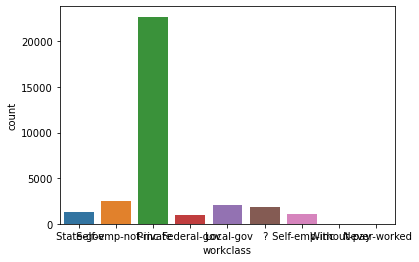

education


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


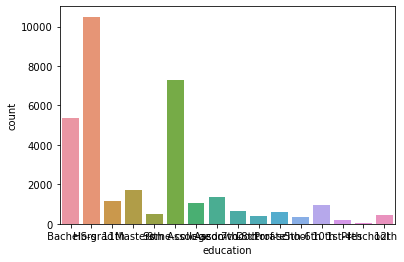

marital-status


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


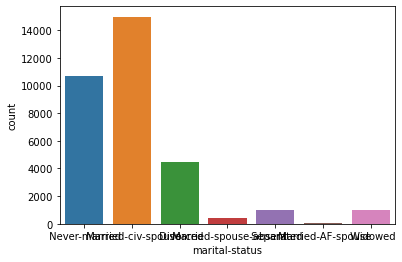

occupation


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


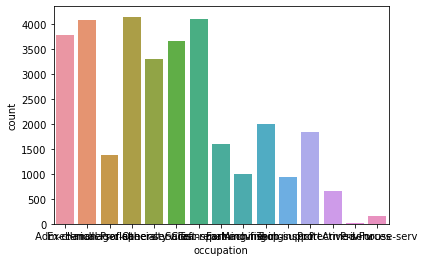

relationship


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


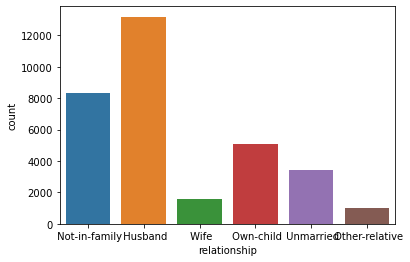

race


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


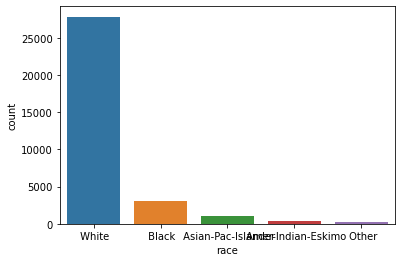

sex


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


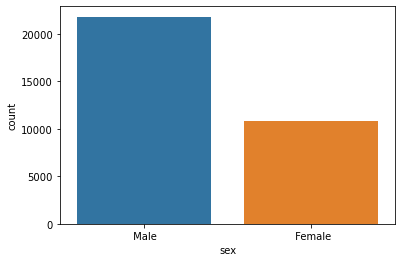

country


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


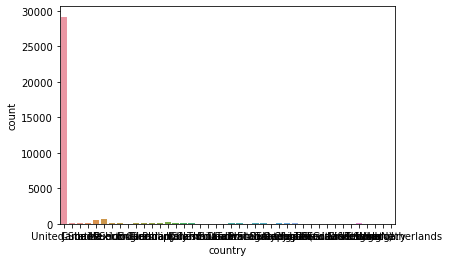

salary


C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


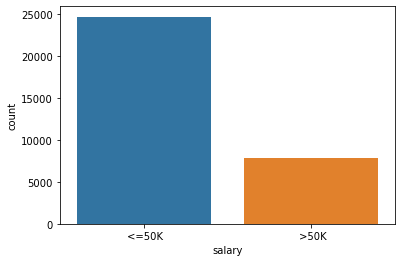

In [28]:
#Visualization of Categorical columns:
for i in df.select_dtypes(include='object').columns:
    print(i)
    sns.countplot(df[i])
    plt.show()

It seems our target column is imbalanced 

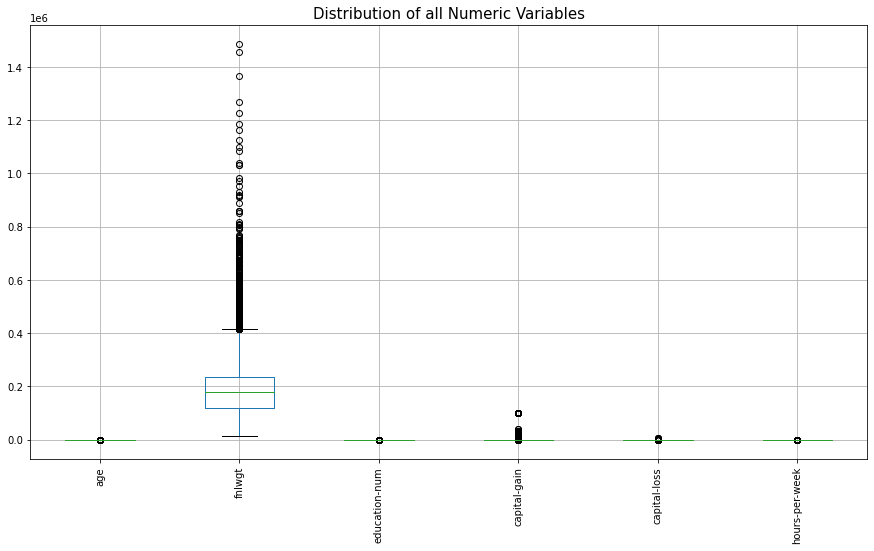

In [35]:
#Visualization of Numerical columns:
plt.figure(figsize = (15,8))
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical' , fontsize  = 10)
plt.show()

age


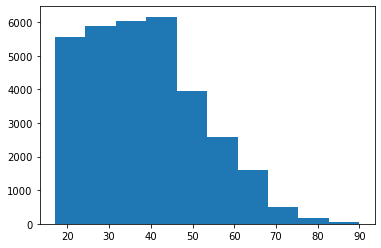

fnlwgt


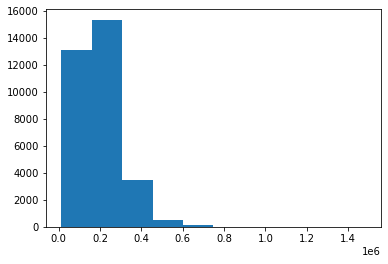

education-num


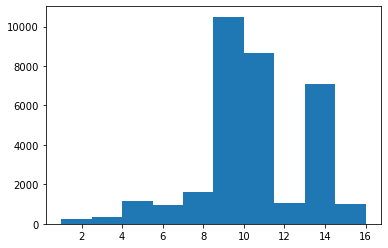

capital-gain


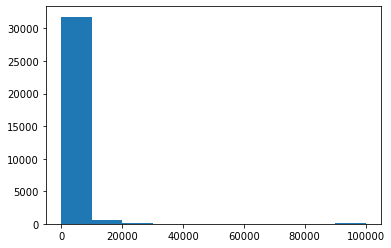

capital-loss


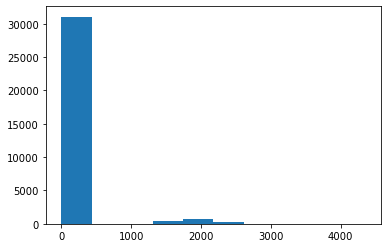

hours-per-week


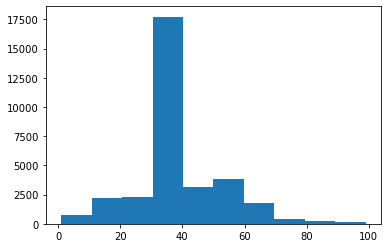

In [40]:
for i in df.select_dtypes(exclude='object').columns:
    print(i)
    plt.hist(df[i])
    plt.show()

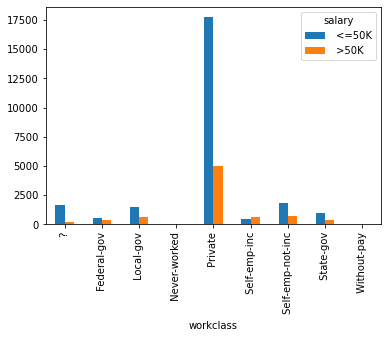

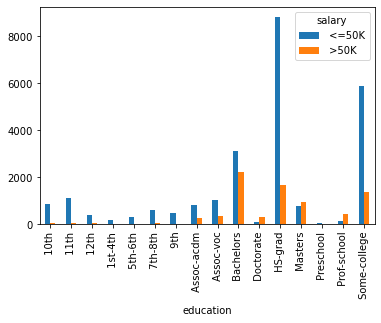

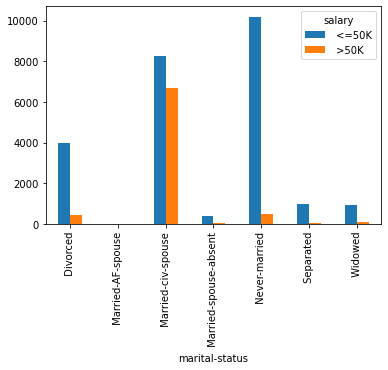

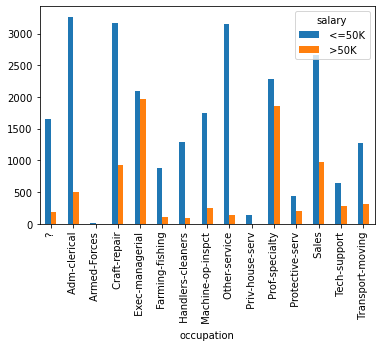

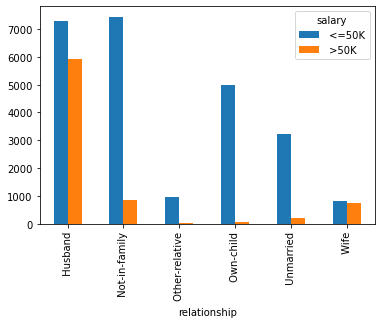

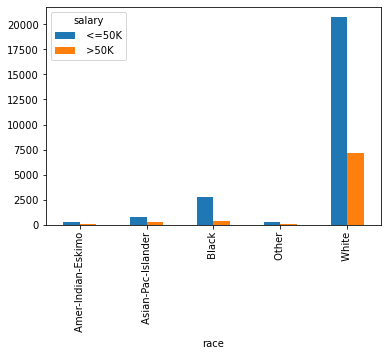

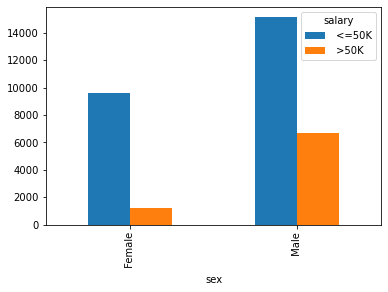

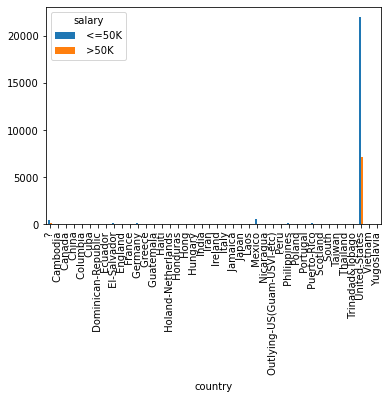

In [41]:
for i in df.drop('salary',axis=1).select_dtypes(include='object').columns:
    pd.crosstab(df[i],df.salary).plot(kind='bar')
    plt.show()

In [42]:
#Doing over sampling to make the target column balanced:
from imblearn.over_sampling import RandomOverSampler

In [44]:
RS = RandomOverSampler()
x=df.drop('salary',axis=1)
y=df['salary']
xy = RS.fit_resample(x,y)

In [45]:
from  collections import Counter
Counter(y)

Counter({' <=50K': 24720, ' >50K': 7841})

In [48]:
x.shape

(32561, 14)

In [51]:
df_new=  pd.concat([x,y],axis=1)
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_new.select_dtypes(include='object').columns:
    df_new[i] = le.fit_transform(df_new[i])

In [53]:
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [55]:
from sklearn.model_selection import train_test_split
X=df_new.drop('salary',axis=1)
Y=df_new['salary']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)
print ('Shape of X_train',X_train.shape)
print ('Shape of X_test', X_test.shape)
print ('Shape of Y_train',Y_train.shape)
print ('Shape of Y_test',Y_test.shape)

Shape of X_train (22792, 14)
Shape of X_test (9769, 14)
Shape of Y_train (22792,)
Shape of Y_test (9769,)


In [60]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer()
PT.fit(X_train)
X_train = PT.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_train.columns
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.596932,0.008186,0.949787,1.398998,-0.081706,0.916313,-0.015815,0.722073,0.413939,0.702969,-0.301223,-0.219429,-2.058045,0.330152
1,-0.370559,0.008186,1.651584,0.096168,-0.471108,-0.382445,1.207418,1.550317,0.413939,-1.422538,-0.301223,-0.219429,-0.034930,0.330152
2,0.029234,0.008186,-1.362669,0.096168,-0.471108,-0.382445,1.564483,-1.095893,0.413939,0.702969,-0.301223,-0.219429,-0.034930,0.330152
3,0.519430,0.008186,0.101033,1.054169,2.043253,-0.382445,-0.506224,-1.095893,0.413939,0.702969,-0.301223,-0.219429,1.187625,0.330152
4,0.831122,0.008186,-0.530108,0.096168,-0.471108,-0.382445,-0.778778,-1.095893,0.413939,0.702969,-0.301223,-0.219429,-0.034930,0.330152


In [68]:
PT.fit(X_test)
X_test = PT.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X_test.columns
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.343979,2.522522,-0.547950,0.077424,-0.448725,0.927717,-1.408077,0.13817,0.410421,-1.421848,-0.301898,-0.22532,-1.981676,0.326481
1,-1.249490,-1.300288,-2.316209,0.077424,-0.448725,0.927717,0.831181,0.13817,0.410421,-1.421848,-0.301898,-0.22532,-0.037125,0.326481
2,0.316444,0.020207,1.964761,-0.742018,0.339171,-0.385880,1.204968,-1.09177,0.410421,0.703310,3.312401,-0.22532,1.558867,0.326481
3,1.343979,0.020207,0.105095,1.360034,-0.061210,-0.385880,-0.494696,-1.09177,0.410421,0.703310,-0.301898,-0.22532,-0.037125,0.326481
4,0.712982,0.791420,0.078984,1.020393,2.056604,-0.385880,0.831181,-1.09177,0.410421,0.703310,3.312442,-0.22532,0.762906,0.326481


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [70]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]


for model in models:
    print(model)
    model = model.fit(X_train, Y_train)
    print("Training Accuracy")
    print(model.score(X_train,Y_train))
    print("Testing Accuracy")
    print(model.score(X_test,Y_test))
    print('\n')

LogisticRegression()
Training Accuracy
0.8246314496314496
Testing Accuracy
0.8255706827720339


DecisionTreeClassifier()
Training Accuracy
1.0
Testing Accuracy
0.7771522161940834


RandomForestClassifier()
Training Accuracy
1.0
Testing Accuracy
0.8265943289998976


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[18:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: 

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy
0.9111091611091611
Testing Accuracy
0.8063261336881974


